         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB
None
Column names: ['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']
Mean Squared Error: 36.2207671404951


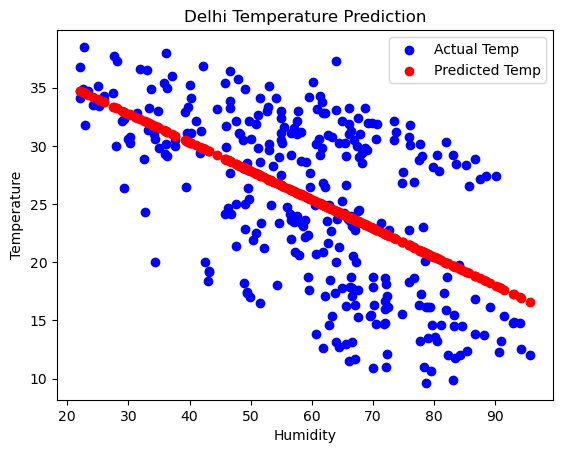

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv("B:\CAPSTONE PROJECT\DailyDelhiClimate.csv")
print(data.head())
print(data.info())

# Check the actual column names in the dataset
print("Column names:", data.columns.tolist())

# Remove missing values
data = data.dropna()

# Select features - adjust column names based on what's actually in your dataset
# For example, the temperature column might be named 'meantemp' or 'temperature' instead of 'temp'
# Let's assume it's 'meantemp' based on common climate datasets
X = data[['humidity']]  # Feature
y = data['meantemp']    # Target - changed from 'temp' to 'meantemp'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual Temp')
plt.scatter(X_test, y_pred, color='red', label='Predicted Temp')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Delhi Temperature Prediction")
plt.legend()
plt.show()